In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

In [2]:
from matplotlib.colors import ListedColormap

# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')

In [3]:
holc_5072 = gpd.read_file('holc_ca_epsg5072_treecov')
holc_5072.head()

,name,holc_id,holc_grade,area_descr,area,_count,_sum,_mean,geometry
0,None,A,A,"{ """" : """" }",Oakland,7737.0,176517.0,22.814657,"POLYGON ((-2256129.514 1954655.076, -2256108.7..."
1,None,A1,A,"{ ""1"" : ""Berkeley Green A-1"", ""10a"" : ""fair"", ...",Berkeley,2130.0,17375.0,8.157277,"POLYGON ((-2258485.837 1965737.749, -2258407.4..."
2,None,A10,A,"{ ""1"" : ""Oakland, California Low Green A-10"", ...",Oakland,194.0,622.0,3.206186,"POLYGON ((-2258903.873 1954942.364, -2258949.8..."
3,None,A11,A,"{ ""1"" : ""Oakland, California Green A-11"", ""10a...",Oakland,345.0,3700.0,10.724638,"POLYGON ((-2256129.514 1954655.076, -2256191.2..."
4,None,A2,A,"{ ""1"" : ""Berkeley, California Green A-2"", ""10a...",Berkeley,746.0,7629.0,10.226542,"POLYGON ((-2259866.714 1965745.875, -2259877.5..."


In [4]:
holc_5072.groupby("area").size().index

Index(['Alameda', 'Albany', 'Berkeley', 'Emeryville', 'Fresno', 'Los Angeles',
       'Oakand', 'Oakland', 'Piedmont', 'San', 'San Diego', 'San Francisco',
       'San Jose', 'Stockton'],
      dtype='object', name='area')

# Los Angeles

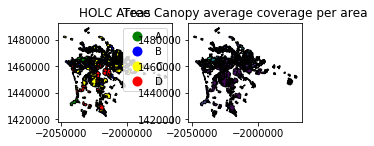

In [5]:
fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax2=plt.subplot(2, 2, 2)

la_tree = holc_5072[holc_5072['area']== "Los Angeles"]

la_tree.plot(ax = ax1, column="holc_grade",  cmap = holc_cmap, legend=True)
ax1.set_title("HOLC Areas")

la_tree.plot(ax = ax2, column="_mean")
ax2.set_title("Tree Canopy average coverage per area")

plt.subplots_adjust(left = 0.3, wspace = 0.01);


# Widget

In [6]:
import ipywidgets as widgets

%run -i widget_script.py
widgets.VBox([widgets.VBox([inp]), out])

<Figure size 2160x1440 with 0 Axes>

In [49]:
inp = widgets.Dropdown(
    options=['Los Angeles', 'Fresno', "San Francisco", "San Jose", "Stockton", "San Diego", 'Oakland'],
    value='Los Angeles',
    description='City:',
    disabled=False,
)

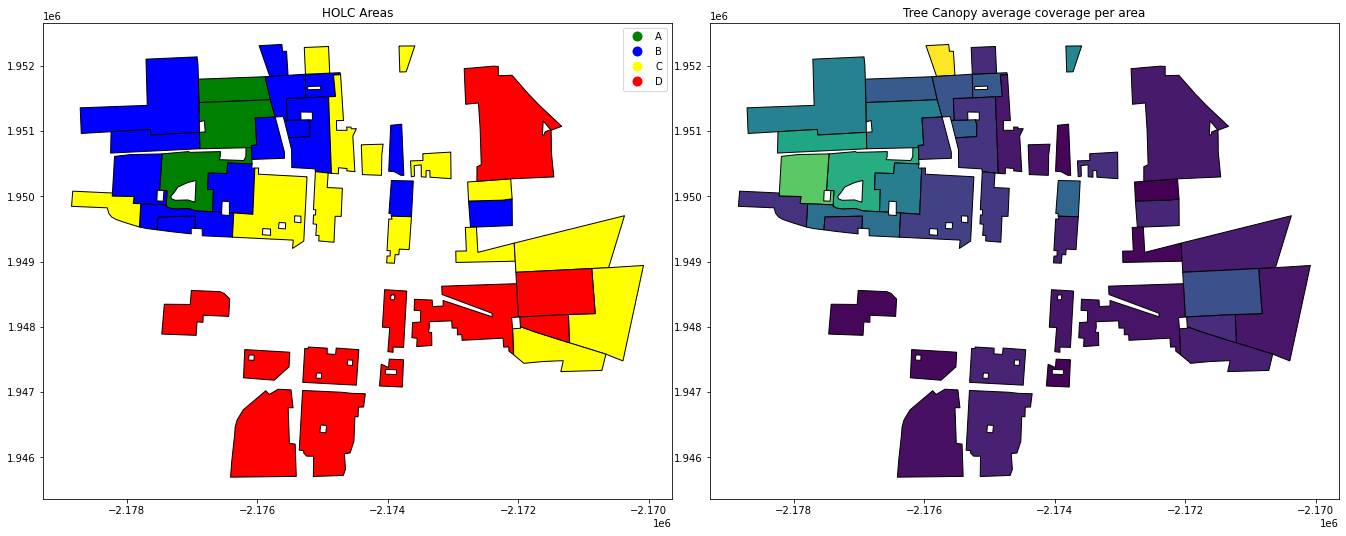

In [79]:
def f(inp):
    if inp != "Oakland":
        city_tree = holc_5072[holc_5072['area']== inp]

    else:
        oakland_area = ['Alameda', 'Albany', 'Berkeley', 'Emeryville', 'Oakand', 'Oakland','Piedmont', 'San']
        city_tree = holc_5072[holc_5072['area'].isin(oakland_area)]
        
    fig = plt.figure()
    ax1=plt.subplot(2, 2, 1)
    ax2=plt.subplot(2, 2, 2)
    
    city_tree.plot(ax = ax1, column="holc_grade",  cmap = holc_cmap, legend=True)
    ax1.set_title("HOLC Areas")

    city_tree.plot(ax = ax2, column="_mean")
    ax2.set_title("Tree Canopy average coverage per area")
    
    plt.subplots_adjust(left = 0.3, wspace = 0.06);
    
f("Stockton")
     